## Cyfrowe przetwarzanie sygnałów i obrazów 
### Laboratorium: Przetwarzanie i analiza sygnału EKG
#### Prowadzący: Dr inż. Jacek Cichosz

| Autorzy | Indeks |
| :------------- | :------------- |
| Magdalena Głowacka | 252692 |
| Mateusz Krupa | 256280 |

#### Ćwiczenie 1.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

[]

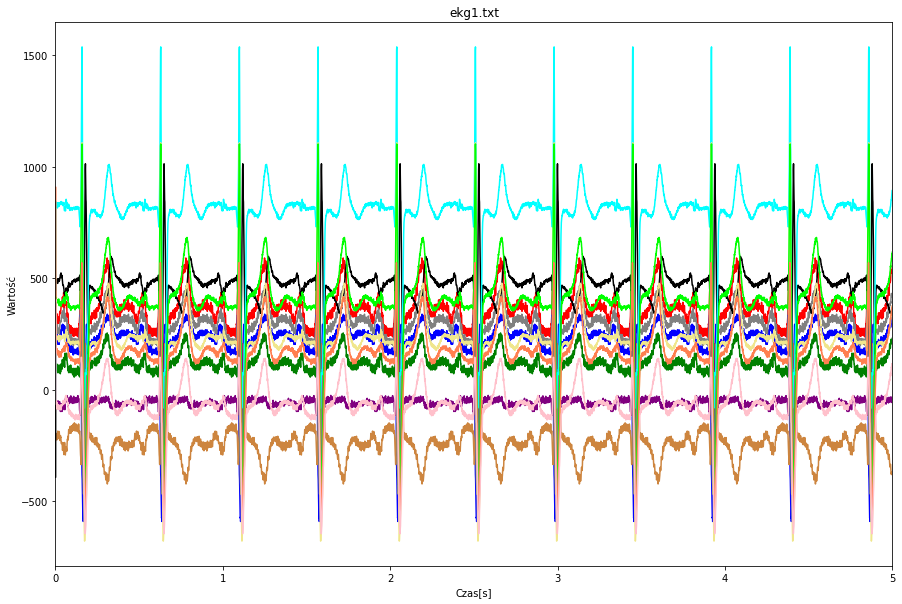

In [3]:
str1=os.getcwd()

ekg1 = pd.read_csv(str1+'\\ekg1.txt', names=['1','2','3','4','5','6','7','8','9','10','11','12'], sep=' ')
sampling_frequency_ekg1 = 1000 # czestotliwosc probkowania 
ekg1_time = ((ekg1.shape[0])/sampling_frequency_ekg1)
ekg1['Czas'] = ekg1.index/sampling_frequency_ekg1 # ustalenie punktów na osi czasu
ekg1 = ekg1.set_index('Czas') # ustawienie czasu jako indexu tabeli

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))

axes.plot(ekg1.index, ekg1['1'], color='green')
axes.plot(ekg1.index, ekg1['2'], color='red')
axes.plot(ekg1.index, ekg1['3'], color='blue')
axes.plot(ekg1.index, ekg1['4'], color='peru')
axes.plot(ekg1.index, ekg1['5'], color='purple')
axes.plot(ekg1.index, ekg1['6'], color='gray')
axes.plot(ekg1.index, ekg1['7'], color='black')
axes.plot(ekg1.index, ekg1['8'], color='cyan')
axes.plot(ekg1.index, ekg1['9'], color='khaki')
axes.plot(ekg1.index, ekg1['10'], color='lime')
axes.plot(ekg1.index, ekg1['11'], color='coral')
axes.plot(ekg1.index, ekg1['12'], color='pink')
axes.set_title('ekg1.txt')
axes.set_xlabel('Czas[s]')
axes.set_ylabel('Wartość')
plt.xlim(0,ekg1_time)
# file_name = input("Podaj nazwe pliku do zapisu: ")
# plt.savefig(file_name + ".jpg")
plt.plot()

[]

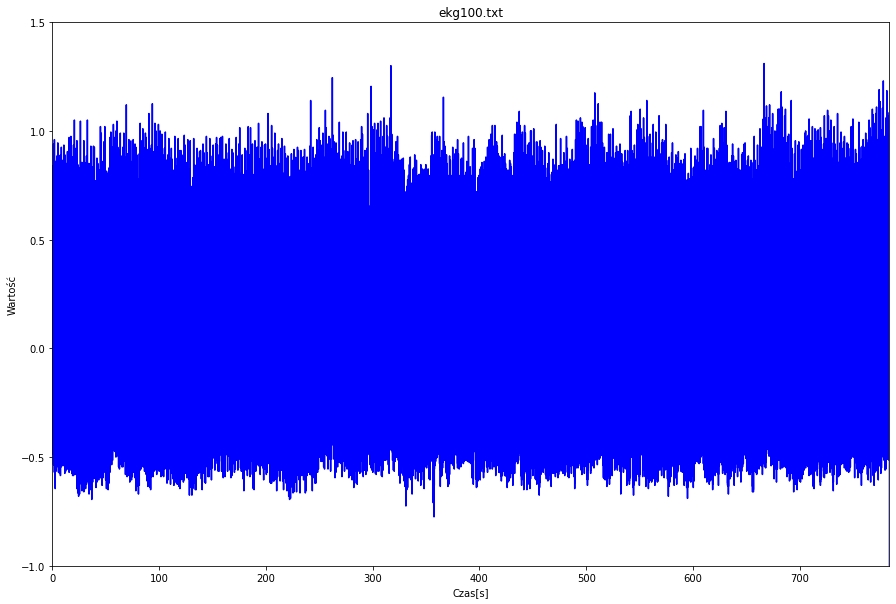

In [4]:
str1=os.getcwd()

ekg100 = pd.read_csv(str1+'\\ekg100.txt', names=['1'])
sampling_frequency_ekg100 = 360 # czestotliwosc probkowania  

ekg100['Czas'] = ekg100.index/sampling_frequency_ekg100 # ustalenie punktów na osi czasu
ekg100 = ekg100.set_index('Czas') # ustawienie czasu jako indexu tabeli
ekg100_time = ((ekg100.shape[0])/sampling_frequency_ekg100)

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
axes.plot(ekg100.index, ekg100['1'], color='blue')
axes.set_title('ekg100.txt')
axes.set_xlabel('Czas[s]')
axes.set_ylabel('Wartość')
plt.xlim(0, ekg100_time)
plt.ylim(-1.0,1.5)
# file_name = input("Podaj nazwe pliku do zapisu: ")
# plt.savefig(file_name + ".jpg")
plt.plot()

[]

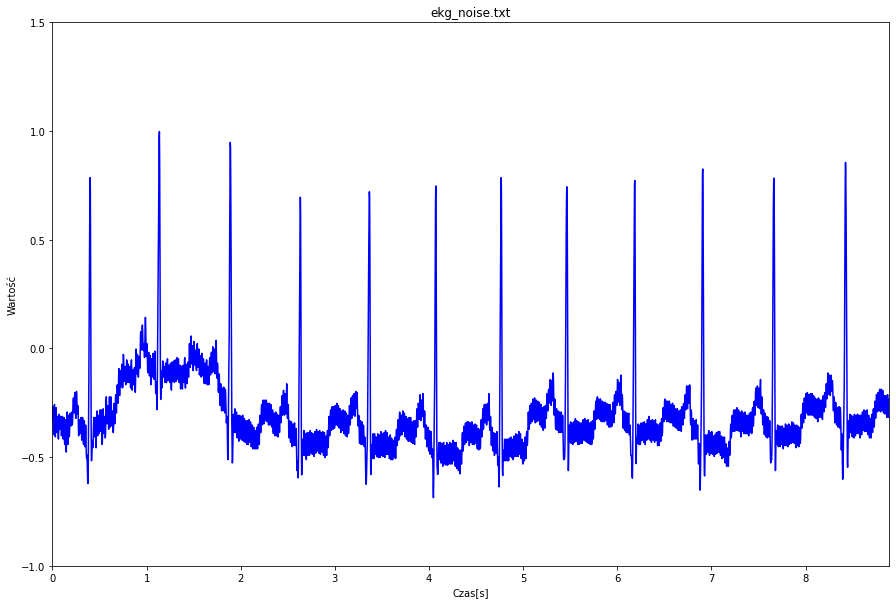

In [5]:
str1=os.getcwd()

ekg_noise = pd.read_csv(str1+'\\ekg_noise.txt', names=['Czas', 'Wartosc amplitudy'], sep='\s+')
sampling_frequency_ekg_noise = 360 # czestotliwosc probkowania  

ekg_noise['Czas'] = ekg_noise.index/sampling_frequency_ekg_noise # ustalenie punktów na osi czasu
ekg_noise = ekg_noise.set_index('Czas') # ustawienie czasu jako indexu tabeli
ekg_noise_time = ((ekg_noise.shape[0])/sampling_frequency_ekg_noise)

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
axes.plot(ekg_noise.index, ekg_noise['Wartosc amplitudy'], color='blue')
axes.set_title('ekg_noise.txt')
axes.set_xlabel('Czas[s]')
axes.set_ylabel('Wartość')
plt.xlim(0, ekg_noise_time)
plt.ylim(-1.0,1.5)
# file_name = input("Podaj nazwe pliku do zapisu: ")
# plt.savefig(file_name + ".jpg")
plt.plot()

#### Ćwiczenie 2.
1)

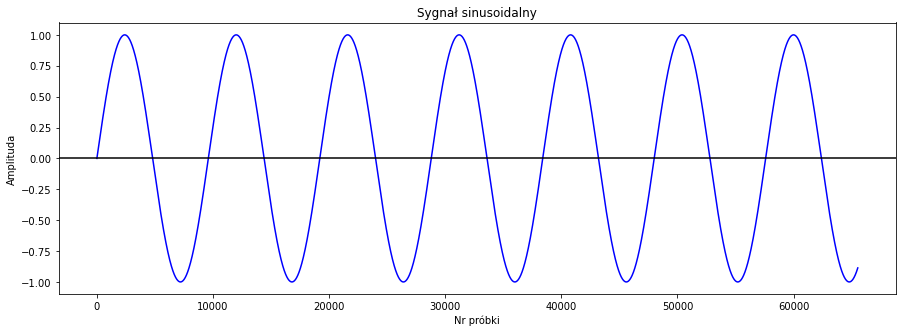

In [6]:
f = 50
length = 65_536
N = np.arange(length)
fs = 480_000

sinus = np.sin(2 * np.pi * N * f/fs)

fig, axes = plt.subplots(ncols=1, nrows = 1, figsize=(15,5))
axes.plot(N, sinus, color='blue')
axes.set_title('Sygnał sinusoidalny')
axes.set_ylabel('Amplituda')
axes.set_xlabel('Numer próbki')
axes.axhline(y=0, color='black')
plt.show()

2)

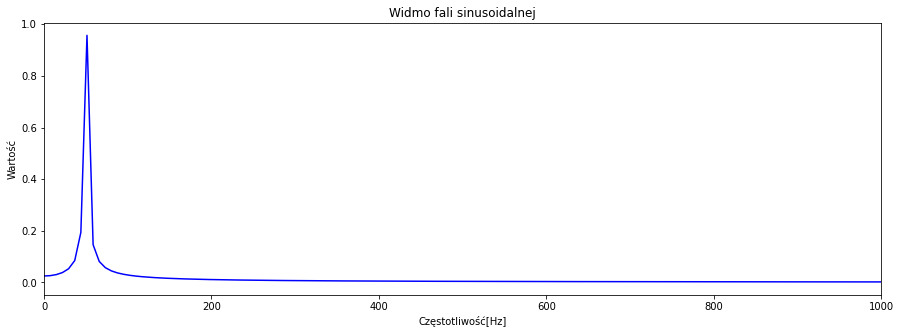

In [7]:
widmo = np.abs(np.fft.rfft(sinus)) / (length/2)
f = np.fft.rfftfreq(length, 1/fs) 

fig, axes = plt.subplots(ncols=1, nrows = 1, figsize=(15,5))
axes.plot(f, widmo, color='blue')
axes.set_title('Widmo fali sinusoidalnej')
axes.set_ylabel('Wartość')
axes.set_xlabel('Częstotliwość[Hz]')
plt.xlim(0,sampling_frequency_ekg1)
plt.show()

3)

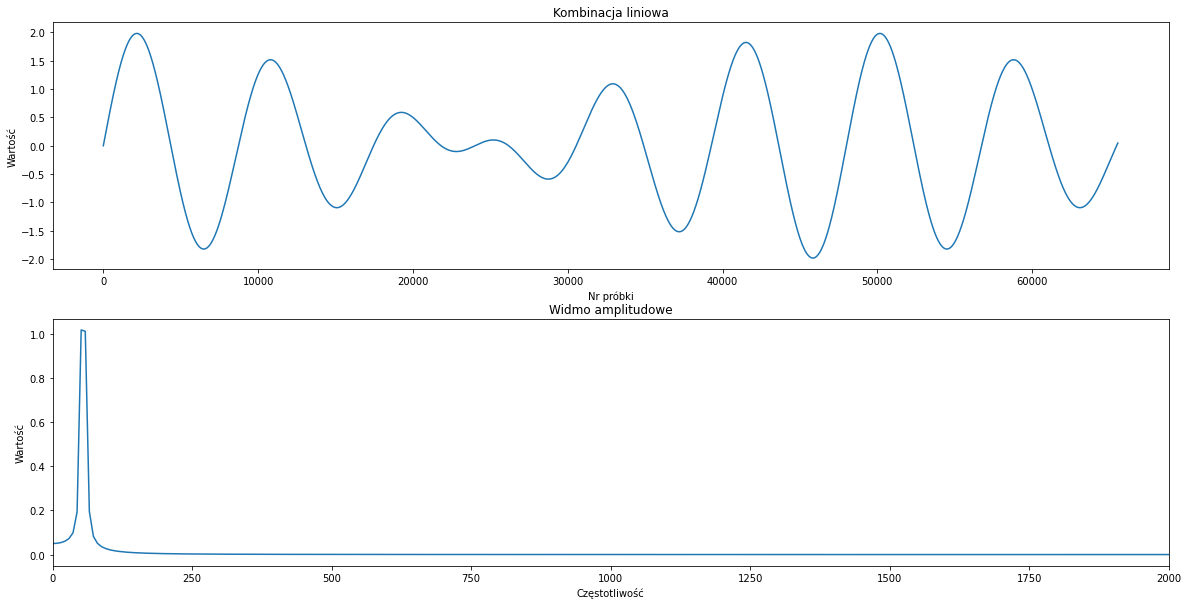

In [22]:

f1 = 50 # ustawienie częstotliwości 50 Hz
f2 = 60 # ustawienie częstotliwości 60 Hz

x = np.arange(length) 

y1 = np.sin(np.pi/240000 * x * f1) 
y2 = np.sin(np.pi/240000 * x * f2) 

spectrum = np.fft.rfft(y1 + y2) 

plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1) 
plt.plot(x,y1 + y2)
plt.title('Kombinacja liniowa')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość')

plt.subplot(2, 1, 2) 
plt.plot(f, np.abs(spectrum_two_sin) / (length/2))
plt.xlim(0, 2000)
plt.title('Widmo amplitudowe')
plt.xlabel('Częstotliwość[Hz]')
plt.ylabel('Wartość')

plt.show()